In [1]:
import pandas as pd
from selenium import webdriver

import time
from tqdm import tqdm
import regex as re
import warnings
warnings.filterwarnings('ignore')

from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By   # para buscar segun tag, id, class, etc...

from selenium.webdriver.support.ui import WebDriverWait   # es para esperar

from selenium.webdriver.support import expected_conditions as EC  # condiciones esperadas...

from selenium.webdriver import ActionChains as AC   # acciones encadenadas, rollo doble click

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

PATH=ChromeDriverManager().install()

In [2]:
url= 'https://www.tripadvisor.es/'

In [3]:
lista= ['Tirana', 'Viena', 'Minsk', 'Sofia', 'Copenhague', 'Ljubljana', 'Tallin', 'Paris',
       'Atenas', 'Dublin', 'Roma', 'Vilna', 'Skopje', 'Chisinau', 'Amsterdam',
       'Lisboa', 'Praga', 'Estocolmo', 'Berlin', 'Bruselas', 'Sarajevo',
       'Zagreb', 'Bratislava', 'Helsinki', 'Budapest', 'Reykjavik', 'Riga',
       'Luxemburgo', 'La valeta', 'Oslo', 'Varsovia', 'Bucarest', 'Belgrado']

In [4]:
links= []
for e in tqdm(lista):
    driver=webdriver.Chrome(PATH)
    driver.get(url)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    driver.execute_script('window.scrollTo(0, 200);')
    buscar= driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[3]/div/div/div/form/input[1]')
    buscar.click()  
    buscar.send_keys(e)
    time.sleep(1)
    buscar.send_keys(Keys.DOWN, Keys.RETURN)
    time.sleep(3)
    if e == 'Luxemburgo':
        driver.execute_script('window.scrollTo(0, 1200);')
        j= driver.find_elements(By.CLASS_NAME, 'Fofmq')[2]
        links += [j.find_element(By.TAG_NAME, 'a').get_attribute('href')]
    else:
        driver.execute_script('window.scrollTo(0, 1800);')
        j = driver.find_elements(By.CLASS_NAME, 'BYvbL')[1]
        links += [j.find_element(By.TAG_NAME, 'a').get_attribute('href')]
    driver.quit()

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:50<00:00, 16.08s/it]


In [9]:
data = pd.DataFrame(columns= ['ciudad', 'links'])

In [12]:
data.ciudad=lista
data.links=links

In [14]:
link_nocturno= []
link_monumentos = []
link_acuaticos= []
link_museos= []
link_spas= []
link_diversion= []
link_naturaleza= []

for e in links:
    if 'Luxembourg' in e or 'Serbia' in e:
        link = e.split('oa0')
    else:
        link = e.split('c42')
    link_nocturno.append(link[0] + 'c20' + link[1])
    link_monumentos.append(link[0] + 'c47' + link[1])
    link_acuaticos.append(link[0] + 'c55' + link[1])
    link_museos.append(link[0] + 'c49' + link[1])
    link_spas.append(link[0] + 'c40' + link[1])
    link_diversion.append(link[0] + 'c56' + link[1])
    link_naturaleza.append(link[0] + 'c57' + link[1])

In [15]:
data['link_nocturno']= link_nocturno
data['link_monumentos']= link_monumentos
data['link_acuaticos']= link_acuaticos
data['link_museos']= link_museos
data['link_spas']= link_spas
data['link_diversion']= link_diversion
data['link_naturaleza']= link_naturaleza

In [19]:
vida_nocturna= []
for e in tqdm(data.link_nocturno):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    time.sleep(2)
    driver.execute_script('window.scrollTo(0, 1300);')
    driver.find_element(By.XPATH, '//*[@id="rating_filter_contents"]/ul/li[2]/div/span/div[1]/label/span').click()
    time.sleep(1)
    vida_nocturna.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['vida_nocturna']= vida_nocturna

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:17<00:00, 15.07s/it]


In [21]:
monumentos= []
for e in tqdm(data.link_monumentos):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, 1300);')
    driver.find_element(By.XPATH, '//*[@id="rating_filter_contents"]/ul/li[2]/div/span/div[1]/label/span').click()
    time.sleep(2)
    monumentos.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['monumentos'] = monumentos

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:28<00:00, 15.42s/it]


In [23]:
deportes_agua= []
for e in tqdm(data.link_acuaticos):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    time.sleep(1)
    deportes_agua.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['deportes_agua'] = deportes_agua

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [07:11<00:00, 13.08s/it]


In [24]:
museos= []
for e in tqdm(data.link_museos):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    if 'Skopje' in e:
        museos.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    else:
        driver.execute_script('window.scrollTo(0, 1800);')
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="rating_filter_contents"]/ul/li[2]/div/span/div[1]/label/span').click()
        time.sleep(2)
        museos.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['museos'] = museos

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:51<00:00, 16.09s/it]


In [26]:
spas= []
for e in tqdm(data.link_spas):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    if 'Skopje' in e or 'Chisinau' in e or 'Sarajevo' in e or 'Valletta' in e:
        spas.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    else:
        driver.execute_script('window.scrollTo(0, 1800);')
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="rating_filter_contents"]/ul/li[2]/div/span/div[1]/label/span').click()
        time.sleep(2)
        spas.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['spas'] = spas

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:35<00:00, 15.61s/it]


In [27]:
diversion= []
for e in tqdm(data.link_diversion):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    driver.execute_script('window.scrollTo(0, 1300);')
    time.sleep(1)
    driver.find_element(By.XPATH, '//*[@id="rating_filter_contents"]/ul/li[2]/div/span/div[1]/label/span').click()
    time.sleep(1)
    diversion.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['diversion']= diversion

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:24<00:00, 15.29s/it]


In [28]:
naturaleza= []
for e in tqdm(data.link_naturaleza):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(3)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    if  'Sarajevo' in e or 'Valletta' in e:
        naturaleza.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    else:
        driver.execute_script('window.scrollTo(0, 1800);')
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="rating_filter_contents"]/ul/li[2]/div/span/div[1]/label/span').click()
        time.sleep(1)
        naturaleza.append(driver.find_element(By.XPATH, '//*[@id="lithium-root"]/main/div[1]/div/div[3]/div/div[2]/div[2]/div[2]/div/div[3]/div/div[2]/div/div/section[1]/div/div/div/span[1]/span').text)
    driver.quit()
data['naturaleza']= naturaleza

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [08:18<00:00, 15.10s/it]


In [29]:
data

,ciudad,links,link_nocturno,link_monumentos,link_acuaticos,link_museos,link_spas,link_diversion,link_naturaleza,vida_nocturna,monumentos,deportes_agua,museos,spas,diversion,naturaleza
0,Tirana,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,57 lugares ordenados por favoritos de los viaj...,30 lugares ordenados por favoritos de los viaj...,27 lugares ordenados por favoritos de los viaj...,14 lugares ordenados por favoritos de los viaj...,23 lugares ordenados por favoritos de los viaj...,18 lugares ordenados por favoritos de los viaj...,7 lugares ordenados por favoritos de los viaje...
1,Viena,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,119 lugares ordenados por favoritos de los via...,295 lugares ordenados por favoritos de los via...,9 lugares ordenados por favoritos de los viaje...,119 lugares ordenados por favoritos de los via...,41 lugares ordenados por favoritos de los viaj...,106 lugares ordenados por favoritos de los via...,48 lugares ordenados por favoritos de los viaj...
2,Minsk,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,36 lugares ordenados por favoritos de los viaj...,68 lugares ordenados por favoritos de los viaj...,6 lugares ordenados por favoritos de los viaje...,45 lugares ordenados por favoritos de los viaj...,20 lugares ordenados por favoritos de los viaj...,64 lugares ordenados por favoritos de los viaj...,17 lugares ordenados por favoritos de los viaj...
3,Sofia,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,106 lugares ordenados por favoritos de los via...,110 lugares ordenados por favoritos de los via...,7 lugares ordenados por favoritos de los viaje...,47 lugares ordenados por favoritos de los viaj...,47 lugares ordenados por favoritos de los viaj...,76 lugares ordenados por favoritos de los viaj...,26 lugares ordenados por favoritos de los viaj...
4,Copenhague,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,125 lugares ordenados por favoritos de los via...,174 lugares ordenados por favoritos de los via...,5 lugares ordenados por favoritos de los viaje...,66 lugares ordenados por favoritos de los viaj...,41 lugares ordenados por favoritos de los viaj...,58 lugares ordenados por favoritos de los viaj...,46 lugares ordenados por favoritos de los viaj...
5,Ljubljana,https://

In [30]:
data.vida_nocturna=data.vida_nocturna.apply(lambda x: int(re.findall('[0-9]+', x)[0]))
data.monumentos=data.monumentos.apply(lambda x: int(re.findall('[0-9]+', x)[0]))
data.deportes_agua=data.deportes_agua.apply(lambda x: int(re.findall('[0-9]+', x)[0]))
data.museos=data.museos.apply(lambda x: int(re.findall('[0-9]+', x)[0]))
data.spas=data.spas.apply(lambda x: int(re.findall('[0-9]+', x)[0]))
data.diversion=data.diversion.apply(lambda x: int(re.findall('[0-9]+', x)[0]))
data.naturaleza=data.naturaleza.apply(lambda x: int(re.findall('[0-9]+', x)[0]))

In [4]:
data['ciudad']= [e for e in range(1,34)]

In [6]:
data.to_excel('links.xlsx', index = False)

In [2]:
data = pd.read_excel('links.xlsx')

In [17]:
monumentos= []
for e in tqdm(data.link_monumentos):
    driver=webdriver.Chrome(PATH)
    driver.get(e)
    time.sleep(2)
    driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]').click()
    textos = driver.find_element(By.CLASS_NAME, 'JfoTr')
    texto = textos.find_elements(By.CLASS_NAME, 'XfVdV')
    for e in texto[:30]:
        monumentos.append(e.text)
    driver.quit()

 15%|████████████▌                                                                      | 5/33 [01:00<05:41, 12.18s/it]--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u010d' in position 179: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application

 33%|███████████████████████████▎                                                      | 11/33 [02:14<04:29, 12.27s/it]--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u0117' in position 161: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u016f' in position 164: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel\kernela

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u011b' in position 187: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel\kernela

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u0107' in position 160: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel\kernela

 94%|█████████████████████████████████████████████████████████████████████████████     | 31/33 [06:13<00:23, 11.99s/it]--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u0163' in position 164: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u021b' in position 203: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel\kernela

Traceback (most recent call last):
  File "C:\Users\silsi\anaconda3\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\silsi\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u0218' in position 182: character maps to <undefined>
Call stack:
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\silsi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\silsi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\silsi\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in s

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [06:38<00:00, 12.07s/it]


In [21]:
frase = '1. Skanderbeg Square'

In [25]:
e.split('.')[-1].strip()

'Skanderbeg Square'

In [18]:
monum= []
for e in monumentos:
    monum.append(e.split('.')[-1].strip())

In [19]:
len(monum)    

990

In [20]:
n = 30
monum1 = [monum[i:i + n] for i in range(0, len(monum), n)]

In [21]:
data['monum']= monum1

In [23]:
data.to_excel('links.xlsx', index = False)

In [24]:
import random

In [25]:
lista = []

for i in range(0,990,30):
    dictio = {}
    
    for e in monum[i:i+30]:
        dictio[e]= random.randint(1, 20)
    lista.append(dictio)

In [26]:
len(lista)

33

In [27]:
data['palabras']= lista

In [28]:
data

,ciudad,links,link_nocturno,link_monumentos,link_acuaticos,link_museos,link_spas,link_diversion,link_naturaleza,vida_nocturna,monumentos,deportes_agua,museos,spas,diversion,naturaleza,palabras,monum
0,1,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,https://www.tripadvisor.es/Attractions-g294446...,57,30,27,14,23,18,7,"{'Skanderbeg Square': 18, 'Et`hem Bey Mosque':...","[Skanderbeg Square, Et`hem Bey Mosque, Orthodo..."
1,2,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,https://www.tripadvisor.es/Attractions-g190454...,119,295,9,119,41,106,48,"{'Palacio de Schönbrunn': 6, 'Historic Center ...","[Palacio de Schönbrunn, Historic Center of Vie..."
2,3,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,https://www.tripadvisor.es/Attractions-g294448...,36,68,6,45,20,64,17,"{'Church of Saints Simon and Helena': 6, 'Isla...","[Church of Saints Simon and Helena, Island of ..."
3,4,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,https://www.tripadvisor.es/Attractions-g294452...,106,110,7,47,47,76,26,"{'Iglesia de Alexander Nevski': 15, 'Vitosha B...","[Iglesia de Alexander Nevski, Vitosha Boulevar..."
4,5,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,https://www.tripadvisor.es/Attractions-g189541...,125,174,5,66,41,58,46,"{'Nyhavn': 16, 'Rosenborg Castle': 19, 'Our Sa...","[Nyhavn, Rosenborg Castle, Our Saviour's Churc..."
5,6,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,https://www.tripadvisor.es/Attractions-g274873...,54,67,6,30,24,35,10,"{'Ljubljana Old Town': 19, 'Puente Triple': 5,...","[Ljubljana Old Town, Puente Triple, Plaza Pres..."
6,7,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,https://www.tripadvisor.es/Attractions-g274958...,52,92,18,75,23,59,25,"{'Tallinn Old Town': 14, 'Colina Toompea': 3, ...","[Tallinn Old Town, Colina Toompea, Tallinna Ra..."
7,8,https://www.tripadvisor.es/Attractions-g187147...,https://www.tripadvisor.es/Attractions-g18

In [29]:
data.to_excel('links.xlsx', index = False)

In [148]:
# %pip install wordcloud

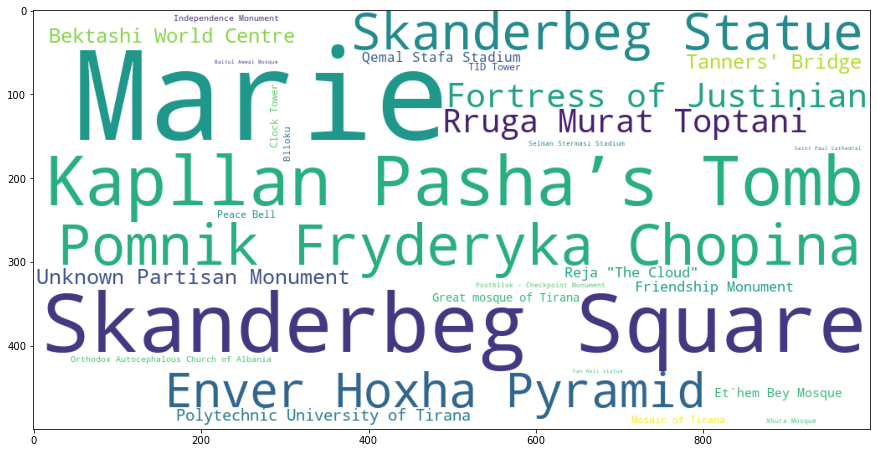

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate_from_frequencies(data.palabras[0])
 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud);

In [4]:
from PIL import Image

In [5]:
# %pip install opencv-python

In [6]:
import cv2

img = cv2.imread('imagenes/shape.png')

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

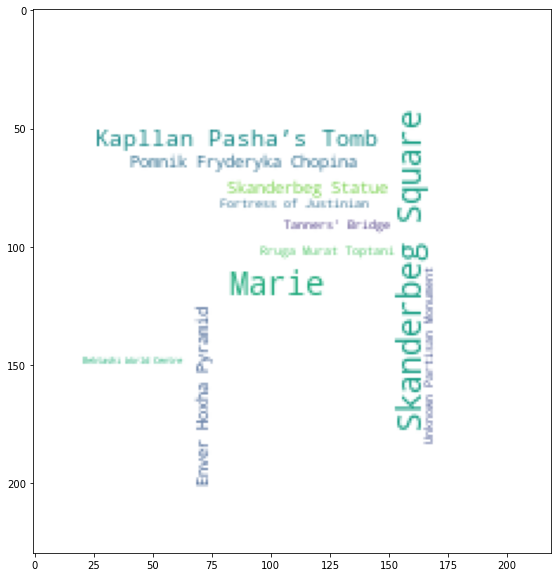

In [32]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white', mask=gray_img).generate_from_frequencies(data.palabras[0])
 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud);